In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from mpl_toolkits.mplot3d import Axes3D


from sklearn.cluster import AgglomerativeClustering

from sklearn.manifold import MDS

from sklearn.decomposition import PCA

from matplotlib import gridspec

In [2]:
import lib

In [3]:
multicolor = True

In [4]:
if multicolor:
    color = ['orange', 'green', 'red', 'yelow', 'blue']
else:
    color = ['black', 'black', 'black', 'black', 'black']
marker = ['^', 's', 'v', 'D', 'P']

In [5]:
plt.rcParams["font.family"] = 'DejaVu Serif'

plt.rcParams['text.usetex'] = True

# Create data

| Initial File                   | Name              | Time series file      | Length, N | T_max | T_min | Number of Type, K | Error | Type of Data| 
| ------------------------------ | ----------------- | --------------------- | --------- |------ | ----- | ----------------- | ----- | ----------- |
| RealData/2.csv                 | Physical Motion 2 | ExperimentData/1.csv  | 900       | 50  | 40  | 2 | 0.03  | Real Data      |
| RealData/1.csv                 | Physical Motion 1 | ExperimentData/2.csv  | 900       | 35  | 25  | 2 | 0.08  | Real Data      |
| SyntheticData/3_patern/2.csv   | Synthetic 1       | ExperimentData/3.csv  | 2000      | 40  | 40  | 3 | 0.008 | Synthetic Data |
| SyntheticData/2_patern/2.csv   | Synthetic 2       | ExperimentData/4.csv  | 2000      | 40  | 40  | 2 | 0.06  | Synthetic Data |
| SyntheticData/Simple/1.csv     | Simple            | ExperimentData/5.csv  | 1000      | 135 | 135 | 2 | 0.14  | Synthetic Data |
| SyntheticData/2_patern/1.csv   | Synthetic 3       | ExperimentData/6.csv  | 2000      | 40  | 40  | 2 | 0.03  | Synthetic Data |
| SyntheticData/2_patern/4.csv   | Synthetic 4       | ExperimentData/7.csv  | 2000      | 40  | 40  | 2 | 0.03  | Synthetic Data |
| SyntheticData/2_patern/5.csv   | Synthetic 5       | ExperimentData/8.csv  | 2000      | 40  | 40  | 2 | 0.04  | Synthetic Data |
| RealData/3.csv                 | Physical Motion 3 | ExperimentData/9.csv  | 900       | 30  | 25  | 2 | 0.09  | Real Data      |
| RealData/4.csv                 | Physical Motion 4 | ExperimentData/10.csv | 800       | 50  | 40  | 2 | 0.01  | Real Data      |

In [347]:
data = pd.read_csv('./RealData/4.csv')

# x_new = data.values.reshape([-1])

t = data.values[100:900, 0:1].reshape([-1])
x = data.values[100:900:, 1:2].reshape([-1])



x_new = lib.normalizer(x, t, t.shape[0])

y = np.zeros_like(x_new)

In [348]:
x_new.shape

(800,)

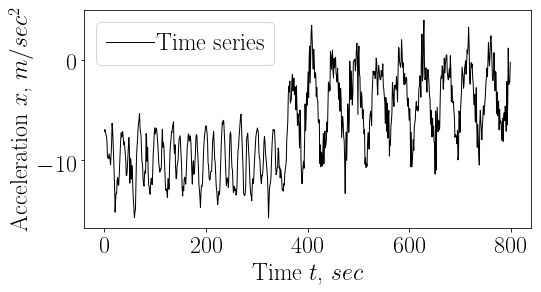

In [394]:
Text_size = 24

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (8.0, 4.0)
plt.rcParams['font.size'] = Text_size
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
#################################################

_ = plt.plot(x_new, '-', color = 'black', label = 'Time series')

plt.xlabel('Time $t$, $sec$')
plt.ylabel('Acceleration $x$, $m/sec^2$')
plt.legend(loc = 'best')
plt.show()

In [356]:
#
y[350:] = 1

In [387]:
T = 50

K = 2

X_test = np.reshape(x_new, [1,-1,1])

In [388]:
# phase track
phase_track = lib.return_phase_track(X_test, T)

# basis vector
List_of_basis_vector, List_of_basis_vector_s, List_of_basis_vector_c = lib.local_basis(phase_track, T = T)

# pairwise matrix
M_pairwise = lib.get_pairwise_matrix(List_of_basis_vector, List_of_basis_vector_s, List_of_basis_vector_c)

# clustering
model = AgglomerativeClustering(n_clusters=K, affinity='precomputed', linkage='complete')
fitted = model.fit(M_pairwise)
prediction_vector = fitted.fit_predict(M_pairwise)


# 2 dimentions projection
embedding = MDS(n_components=2, dissimilarity='precomputed')
resss = embedding.fit_transform(M_pairwise)

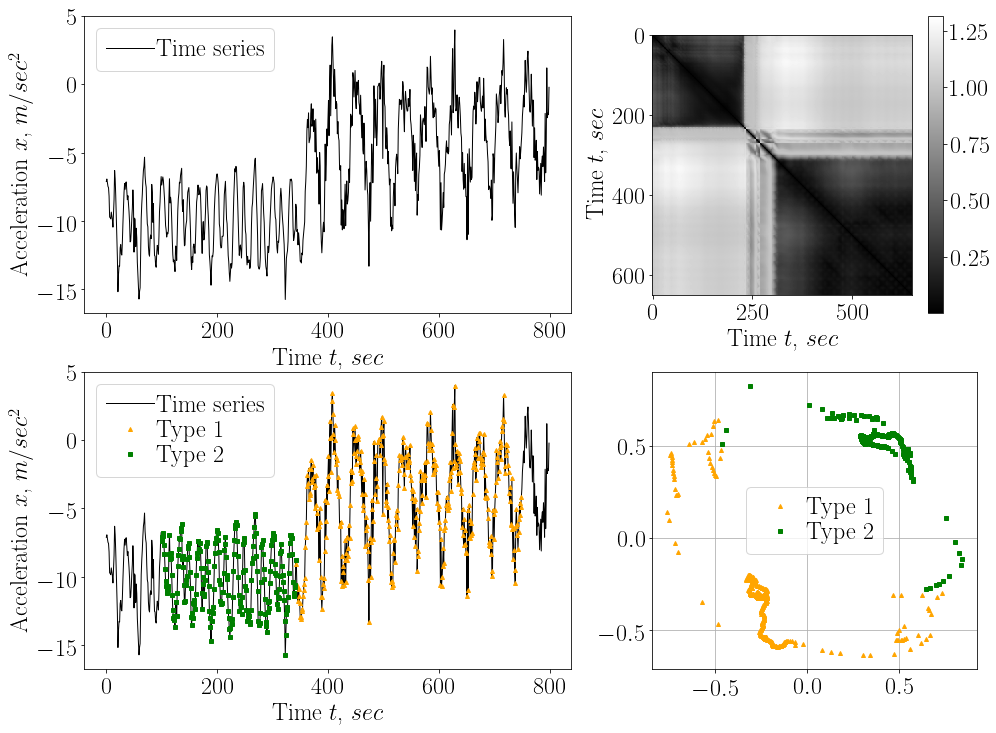

In [389]:
Text_size = 24

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (16.0, 12.0)
plt.rcParams['font.size'] = Text_size
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
#################################################



fig = plt.figure();

gs = gridspec.GridSpec(2, 2, width_ratios=[1.5, 1])

ax1 = fig.add_subplot(gs[0]);
ax2 = fig.add_subplot(gs[1]);
ax3 = fig.add_subplot(gs[2]);
ax4 = fig.add_subplot(gs[3]);

#------___1___------
_ = ax1.plot(X_test[0], '-', color = 'black', label = 'Time series')
ax1.set_xlabel('Time $t$, $sec$')
ax1.set_ylabel('Acceleration $x$, $m/sec^2$')
ax1.legend(loc = 'best')

#------___2___------
im = ax2.imshow(M_pairwise, cmap='gray')
fig.colorbar(im, ax=ax2)
ax2.set_xlabel('Time $t$, $sec$')
ax2.set_ylabel('Time $t$, $sec$')


#------___3___------
_ = ax3.plot(X_test[0], '-', color = 'black', label = 'Time series')
for t in np.unique(prediction_vector):
    ind = np.where(prediction_vector == t)
    _ = ax3.plot(np.arange(2*T, X_test[0].shape[0] - T)[ind], X_test[0][2*T:X_test[0].shape[0]-T][ind], linewidth = 0, marker = marker[t], color = color[t], label = 'Type ' + str(t + 1))
ax3.legend(loc = 'best')
ax3.set_xlabel('Time $t$, $sec$')
ax3.set_ylabel('Acceleration $x$, $m/sec^2$')

#------___4___------
for t in np.unique(prediction_vector):
    ind = np.where(prediction_vector == t)
    _ = ax4.plot(resss[:, 0][ind], resss[:, 1][ind], linewidth = 0, marker = marker[t], color = color[t], label = 'Type ' + str(t + 1))
ax4.grid()
ax4.legend(loc = 'best')
# ax4.set_xlabel('First principal component')
# ax4.set_ylabel('Second principal component')

plt.show()

In [391]:
(lib.sort_prediction(prediction_vector) != y[2*T:-T]).sum()/ prediction_vector.shape[0]

0.010769230769230769

In [392]:
answer = pd.DataFrame(np.array([x_new, y]).T, columns=['x', 'y'])

In [393]:
answer.to_csv("ExperimentData/10.csv", index = False)